This computational excercise was adapted from the Matlab version in Physical Biology of the Cell by Phillips, Kondev, Theriot and Garcia. 

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In this computational exploration we want to simulate the random
partitioning of fluorescent molecules between the two daughters after
cell division. By looking at the fluctuations in this partitioning 
we will be able  to relate the intensity to the number of molecules
through the calibration factor.

The idea is to choose a number of molecules in a mother cell and flip a
coin for each one of those molecules in order to decide whether it will
go to daughter cell number 1 or daughter cell number 2. We will then
repeat this procedure "Ncells" times.

In [2]:
Ncells=100

We need to decide how many molecules the mother cell will have.
Let's define a vector that has  values spanning
between 0 and 2000 molecules per mother cell and we will step
through these values in increments of 25.

In [3]:
Nmolecules = np.arange(0,2001,25)

Now, we create vectors for each daughter cell where we will save the
result of each coin flip. In order to initialize them we use the function
"zero" which creates a zero matrix of the dimensions given in its
argument. In this case the matrices will have Ncells rows and columns
corresponding to each element of Nmolecules, the starting number of molecules
in the mother cell

In [4]:
daughter1 = np.zeros((Ncells,len(Nmolecules)))
daughter2 = np.zeros_like(daughter1)

We want to define various loops that walk us through the repeated series
of cell divisions and partitioning events. The first loop (index k)
will go through each element of Nmolecules, the different starting number
of molecules in the mother cell. The second for loop (index j) 
will repeat the process of division Ncell times. Finally, the 
third loop (index i) will flip the coin for each one of the molecules.

In [5]:
for k in range(len(Nmolecules)):
    for j in range(Ncells):
        for i in range(Nmolecules[k]):
            #In order to decide if the molecule goes to daughter 1 or
            #daughter 2 we draw a random number between zero and one.
            #This is done using the function "np.random.rand". If the result is
            #larger than 0.5, then assign the molecule to daughter 1.
            #Otherwise assign it to daughter 2.
            num = np.random.rand()
            
            #It is important to keep track of the various indices. Remember
            #the definitions of "j" and "k".
            if num > 0.5:
                daughter1[j,k] = daughter1[j,k]+1
            else:
                daughter2[j,k] = daughter2[j,k]+1

We want to simulate an actual experiment where we can measure
fluorescence, but not directly count the number of molecules in a cell.
In order to related fluorescence and number of molecules we define the
calibration factor "alpha".

In [6]:
alpha = 20.25

Using this calibration factor we now generate  vectors that are related to
intensity. For the total number of molecules in the mother cell we get

In [7]:
Itot = alpha*Nmolecules

#and for the two daughter cells we get:
I1 = alpha*daughter1
I2 = alpha*daughter2

#Note that these intensities are themselves variables with indices (same dimensions of daughter1/2)

As schematized in the figure below, we can measure
the fluorescence of the mother cell and the fluctuations in the
partitioning of fluorescence between the daughter cells. 

![Figure illustrating the concept.](PBotC_Fig2.10_CountingByDilution.jpg)


Let's generate this plot for our simulated data.

In [8]:
#To help us determine what to plot, take a look at the shape of the array
I1.shape

(100, 81)

<IPython.core.display.Javascript object>


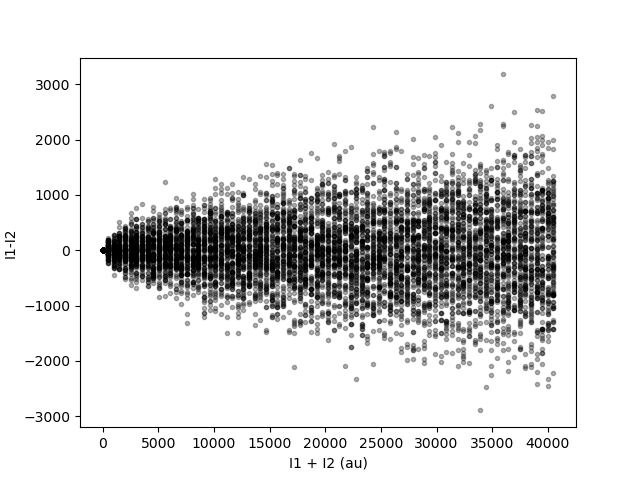

Text(0, 0.5, 'I1-I2')

In [20]:
%matplotlib notebook

## On the x-axis we'll have the intensity of the mother cell. This is proportional to the total # of molecules.
## On the y-axis, we plot the *difference* between the intensity of the two daughter cells. 
## Remember, that we have 100 mother cells for each # of molecules we calibrate for.

plt.figure()
for i in range(I1.shape[0]):
    #we loop over the number of cells
    plt.plot(Itot, I1[i]-I2[i], 'k.', alpha=0.3) #the 'alpha' makes the points semi-transparent
plt.xlabel("I1 + I2 (au)")
plt.ylabel("I1-I2")

<IPython.core.display.Javascript object>


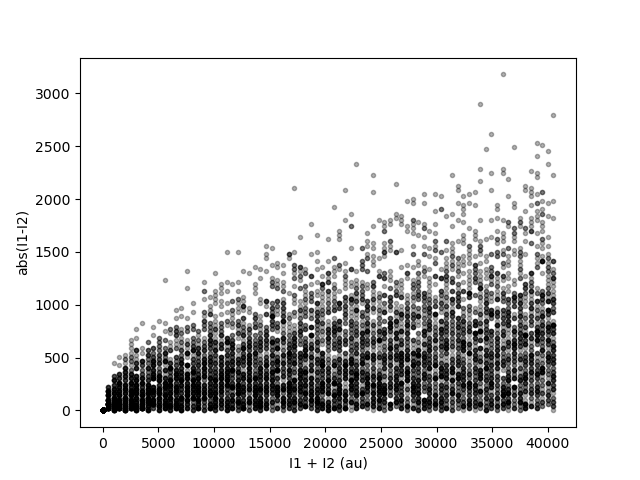

Text(0, 0.5, 'abs(I1-I2)')

In [23]:
%matplotlib notebook

## On the x-axis we'll have the intensity of the mother cell. This is proportional to the total # of molecules.
## On the y-axis, we plot the absolute value of the difference between the intensity of the two daughter cells. 
## Remember, that we have 100 mother cells for each # of molecules we calibrate for.

plt.figure()
for i in range(I1.shape[0]):
    #we loop over the number of cells
    plt.plot(Itot, np.sqrt((I1[i]-I2[i])**2), 'k.', alpha=0.3)
plt.xlabel("I1 + I2 (au)")
plt.ylabel("abs(I1-I2)")

Can we infer the calibration factor from our simulated data? In order to
do, we need to show that there is a linear relation between the mean square
difference in fluorescence and the total fluorescence and that
the proportionality constant is given by the calibration factor.

Let's start by calculating the mean square partitioning error using the
function "mean". 

In [10]:
MeanPartitioningSquare = np.mean((I1-I2)**2,axis=0)  #we find the mean over the first axis (averaging over all cells)

And let's see what this mean looks like

<IPython.core.display.Javascript object>


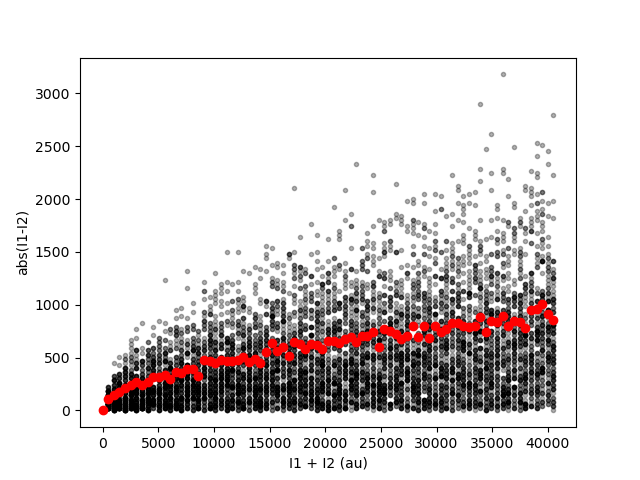

Text(0, 0.5, 'abs(I1-I2)')

In [24]:
%matplotlib notebook

## On the x-axis we'll have the intensity of the mother cell. This is proportional to the total # of molecules.
## On the y-axis, we plot the absolute value of the difference between the intensity of the two daughter cells. 
## Remember, that we have 100 mother cells for each # of molecules we calibrate for.

plt.figure()
for i in range(I1.shape[0]):
    #we loop over the number of cells
    plt.plot(Itot, np.sqrt((I1[i]-I2[i])**2), 'k.', alpha=0.3)
plt.plot(Itot, np.sqrt(MeanPartitioningSquare), 'ro')
plt.xlabel("I1 + I2 (au)")
plt.ylabel("abs(I1-I2)")

With the following, we will fit our data to a one-degree polynomial (we'll ignore the y-intercept)

In [11]:
p = np.polyfit(Itot, MeanPartitioningSquare, 1) #"polyfit" is a built in NumPy function.
alpha_fit = p[0]
print("The fit value of alpha came to be: %.3f" % alpha_fit)

The fit value of alpha came to be: 20.323


<IPython.core.display.Javascript object>


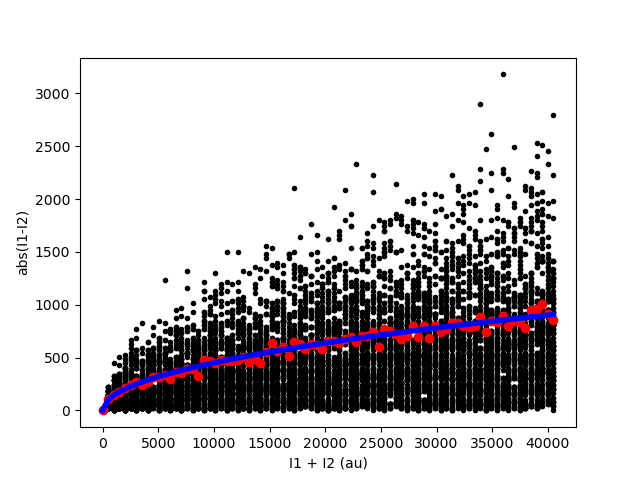

Text(0, 0.5, 'abs(I1-I2)')

In [25]:
plt.figure()
for i in range(I1.shape[0]):
    #we loop over the number of cells
    plt.plot(Itot, np.sqrt((I1[i]-I2[i])**2), 'k.')
plt.plot(Itot, np.sqrt(MeanPartitioningSquare), 'ro')
plt.plot(Itot, np.sqrt(alpha_fit * Itot), '-b', lw=4)
plt.xlabel("I1 + I2 (au)")
plt.ylabel("abs(I1-I2)")

As a result, as long as the assumptions of random partitioning apply, we
will be able to infer the relation between number of fluorescent
molecules and their actual fluorescence by just looking at fluctuations
between daughter cells.